# Exploratory Data Analysis on Spotify 2023 Dataset

## Importing necessary data and libraries

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b> Importing the given the csv file through pandas </b>

In [384]:
# Thank you stackoverflow for the latin-1
df = pd.read_csv("spotify-2023.csv", encoding = "latin-1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Dataset Overview

In [386]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Data Fixing
<b>Fixes missing data by turning them to NaN and converts to appropriate data type</b>

In [388]:
# Converts Streams to numeric data type.
columns_to_convert = ['streams']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Checks the updated data types
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

## Basic Descriptive Statistics
<b> Mean, Median, and Standard deviation of the streams column </b>

In [390]:
# Summary stats for streams
print(df["streams"].describe())
# Mean, median, standard deviation
print("Mean:", df["streams"].mean())
print("Median:", df["streams"].median())
print("Standard Deviation:", df["streams"].std())

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64
Mean: 514137424.93907565
Median: 290530915.0
Standard Deviation: 566856949.0388832


<b>Overview on the relationship between release year and artist count<b/>

In [392]:
# A summary statistics for the released_year and artist_count
print(df["released_year"].describe())
print(df["artist_count"].describe())

count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64
count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64


<b> Plots of released_year and artist_count </b>

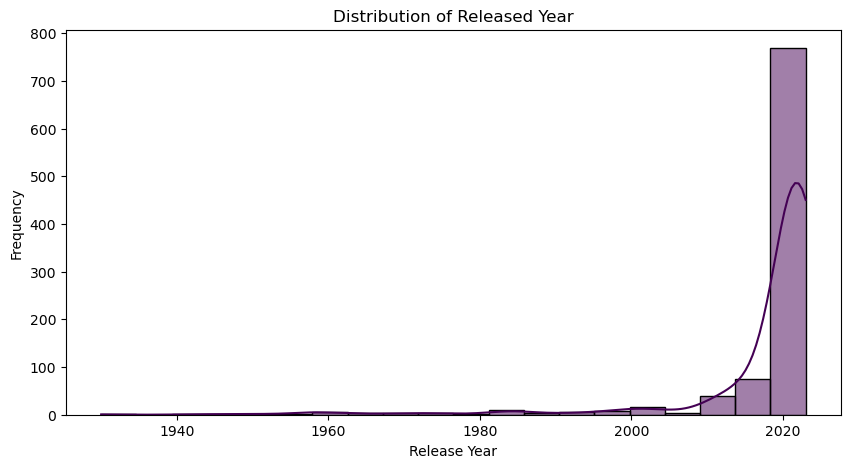

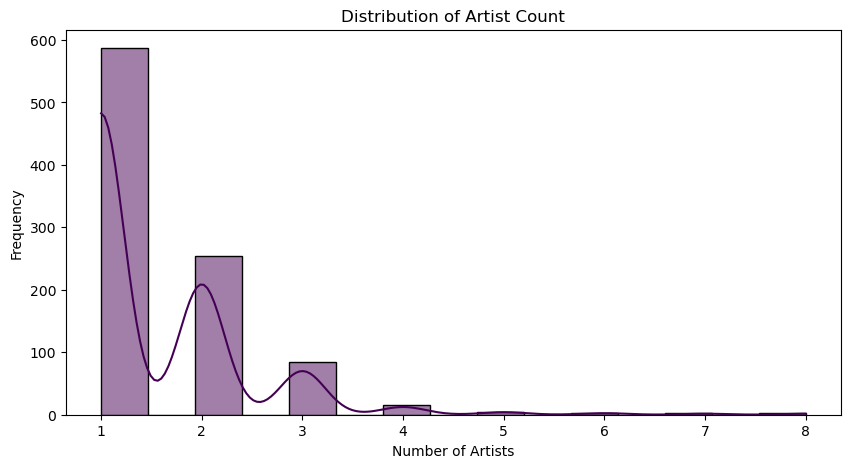

In [394]:
# Plotting released_year distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["released_year"], bins=20, kde=True)
plt.title("Distribution of Released Year")
plt.xlabel("Release Year")
plt.ylabel("Frequency")

plt.show()

# Plotting artist_count distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["artist_count"], bins=15, kde=True)
plt.title("Distribution of Artist Count")
plt.xlabel("Number of Artists")
plt.ylabel("Frequency")

plt.show()

<b> Box plot to see discrepancies easier </b>

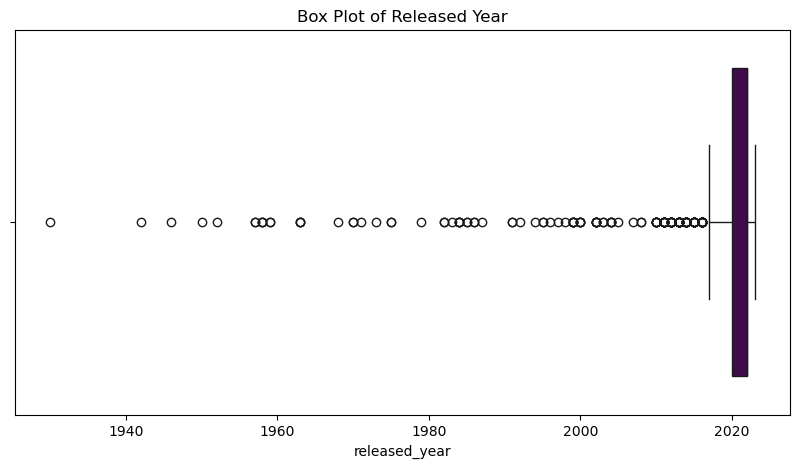

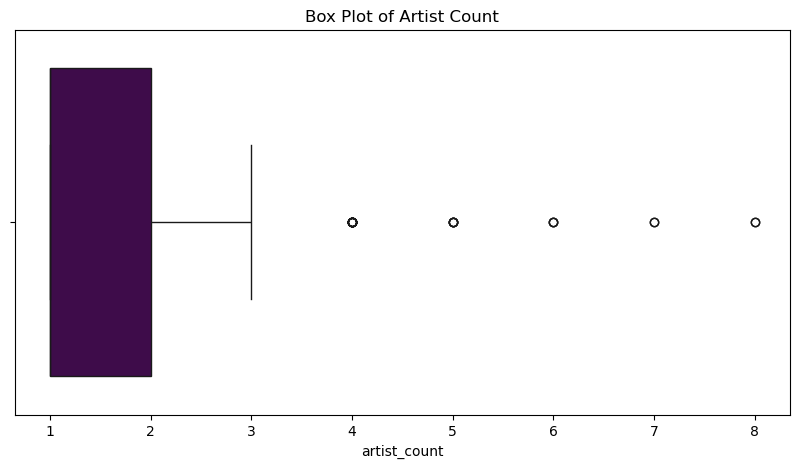

In [396]:
# Box plot for the released_year
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["released_year"])
plt.title("Box Plot of Released Year")
plt.show()

# Box plot for the artist_count
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["artist_count"])
plt.title("Box Plot of Artist Count")

plt.show()

## Top Performers

<b> Finding the top 5 streamed songs </b>

In [399]:
# Sorts the dataset by streams and in descending order and display the top 5
highest_streams = df.sort_values(by="streams", ascending=False).head(5)
highest_streams[["track_name", "streams"]]

,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


<b> Finding the top 5 most frequent artist </b>

In [401]:
# Counts the occurrences of each artist and display the top 5
top_artists = df["artist(s)_name"].value_counts().head(5)
top_artists

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

## Temporal Trends

<b> Plotting the number of tracks released per year. </b>

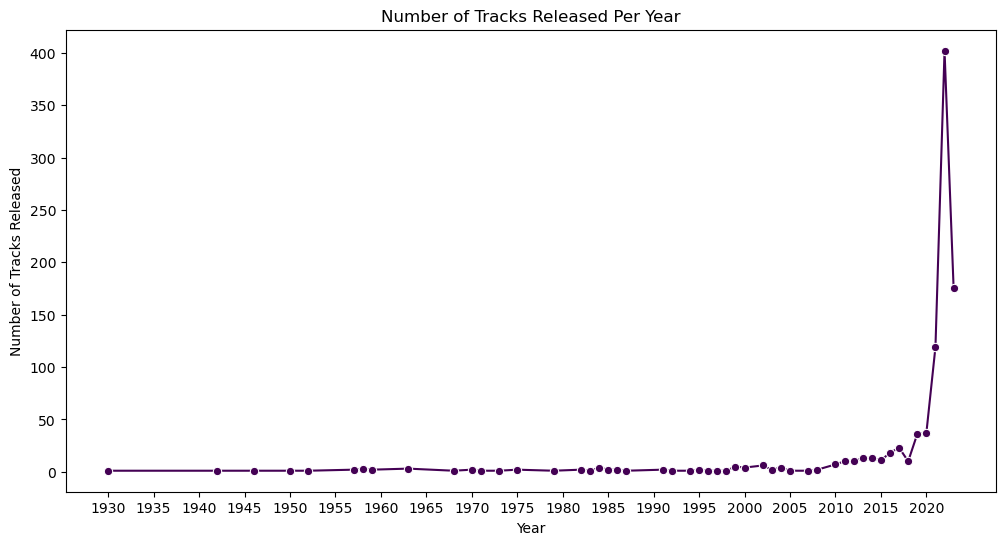

In [404]:
# Groups the released_year and counts the number of tracks made during that time
tracks_per_year = df["released_year"].value_counts().sort_index()

# Plots the tracks_per_year
plt.figure(figsize=(12, 6))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker="o")
plt.title("Number of Tracks Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks Released")

# ChatGPT told me to do this to make the years by 5
plt.xticks(np.arange(min(tracks_per_year.index), max(tracks_per_year.index) + 1, 5))

plt.show()

<b> Number of tracks released each month. </b>

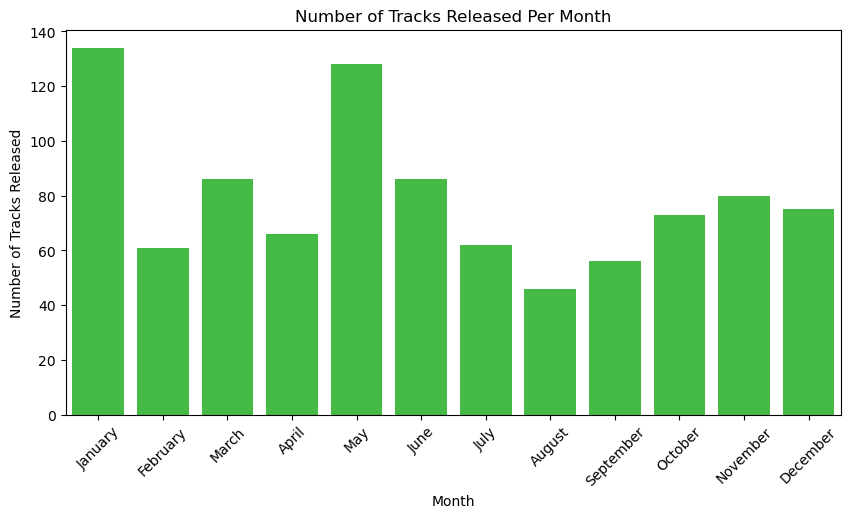

In [406]:
# I wanted the 1-12 to be Jan-Dec so ChatGPT 😩
import calendar

# Groups the released_month and counts the number of tracks made during that time
tracks_per_month = df["released_month"].value_counts().sort_index()

# This maps the month numbers to month names
month_names = {i: calendar.month_name[i] for i in range(1, 13)}
tracks_per_month.index = tracks_per_month.index.map(month_names)

# Plots the tracks_per_month
plt.figure(figsize=(10, 5))
sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values, color="limegreen")
plt.title("Number of Tracks Released Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Tracks Released")
plt.xticks(rotation=45)

plt.show()

## Genre and Music Characteristics
<b> Correlation Matrix for the streams and its musical attributes </b>

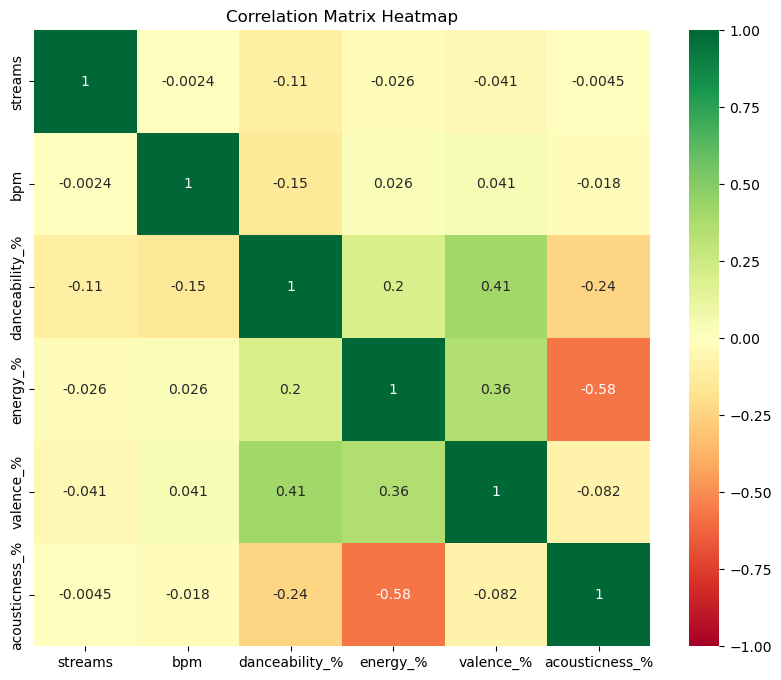

In [408]:
# Calculates the correlation matrix for the selected columns
correlation_matrix = df[["streams", "bpm", "danceability_%", "energy_%", "valence_%", "acousticness_%"]].corr()

# Plots the heatmap of correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Platform Popularity
<b> Determining what platform favors the most popular tracks </b>

In [410]:
# Calculates the sum of each platform-related column
playlist_counts = df[["in_spotify_playlists", "in_spotify_charts", "in_apple_playlists"]].sum()
print(playlist_counts)

# Calculate the average of each platform-related column
playlist_average = df[["in_spotify_playlists", "in_spotify_charts", "in_apple_playlists"]].mean()
print(playlist_average)

in_spotify_playlists    4955719
in_spotify_charts         11445
in_apple_playlists        64625
dtype: int64
in_spotify_playlists    5200.124869
in_spotify_charts         12.009444
in_apple_playlists        67.812172
dtype: float64


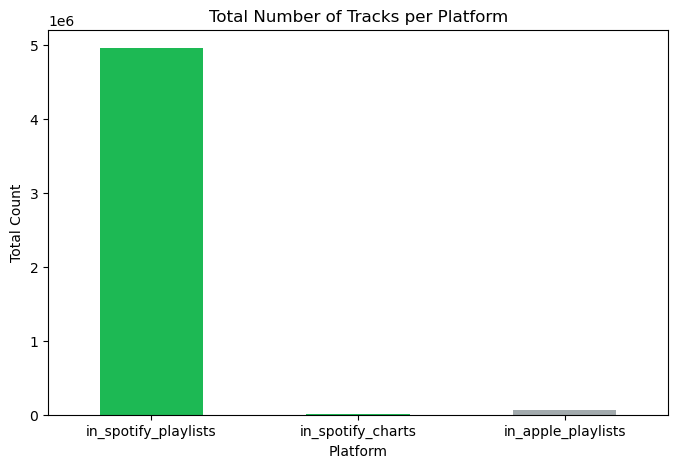

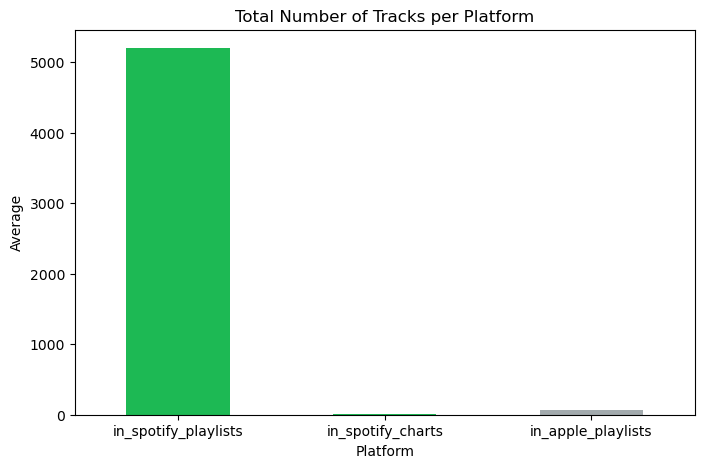

In [411]:
# Plots playlist_count
plt.figure(figsize=(8, 5))
playlist_counts.plot(kind='bar', color=["#1DB954", "#1DB954", "#A2AAAD"])
plt.title("Total Number of Tracks per Platform")
plt.xlabel("Platform")
plt.ylabel("Total Count")
plt.xticks(rotation=0)

plt.show()

# Plots playlist_average
plt.figure(figsize=(8, 5))
playlist_average.plot(kind='bar', color=["#1DB954", "#1DB954", "#A2AAAD"])
plt.title("Total Number of Tracks per Platform")
plt.xlabel("Platform")
plt.ylabel("Average")
plt.xticks(rotation=0)

plt.show()

## Advanced Analysis
<b> Patterns among key and mode </b>

In [413]:
# Calculate average and median streams based on key and mode
streams_pattern_keymode = df.groupby(["key", "mode"])["streams"].agg(["mean", "median"]).reset_index()
print(streams_pattern_keymode)

   key   mode          mean       median
0    A  Major  4.019603e+08  247737946.0
1    A  Minor  4.173906e+08  232896922.0
2   A#  Major  6.275336e+08  488386797.0
3   A#  Minor  4.849231e+08  206929807.0
4    B  Major  4.363336e+08  236857112.0
5    B  Minor  5.825110e+08  422362992.5
6   C#  Major  6.285883e+08  302006641.0
7   C#  Minor  5.665252e+08  312622938.0
8    D  Major  5.720180e+08  331163090.0
9    D  Minor  3.425588e+08  246376690.0
10  D#  Major  6.819623e+08  398136734.5
11  D#  Minor  4.793647e+08  198275403.0
12   E  Major  7.605963e+08  635412045.0
13   E  Minor  5.083264e+08  253650850.0
14   F  Major  5.279311e+08  286371308.0
15   F  Minor  4.102836e+08  248088961.0
16  F#  Major  4.175450e+08  235505538.0
17  F#  Minor  5.954921e+08  319566866.0
18   G  Major  4.929813e+08  266298719.5
19   G  Minor  3.637593e+08  250641672.0
20  G#  Major  5.458044e+08  330881149.0
21  G#  Minor  3.219036e+08  213656754.0


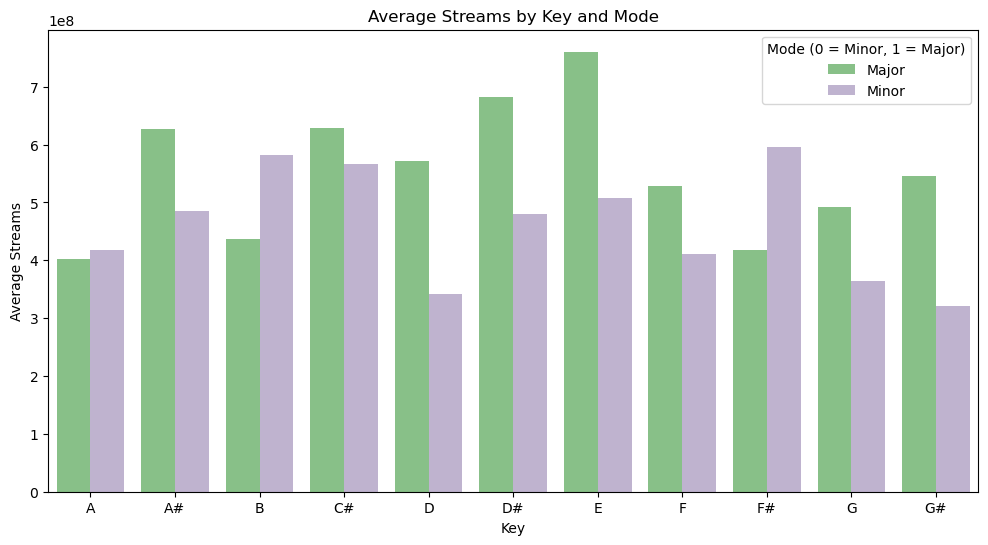

In [414]:
# Plots streams_pattern_keymode
plt.figure(figsize=(12, 6))
sns.barplot(data=streams_pattern_keymode, x="key", y="mean", hue="mode", palette="Accent")
plt.title("Average Streams by Key and Mode")
plt.xlabel("Key")
plt.ylabel("Average Streams")
plt.legend(title="Mode (0 = Minor, 1 = Major)")

plt.show()

<b> Most frequently appearing artist overall on both platforms </b>

In [416]:
# Sum playlist and chart counts by artist
artist_overall_counts = df.groupby("artist(s)_name")[["in_spotify_playlists", "in_spotify_charts", "in_apple_playlists"]].sum()

# Sort by total appearances across all platforms
artist_overall_counts["total_appearances"] = artist_overall_counts.sum(axis=1)
top_artists = artist_overall_counts.sort_values("total_appearances", ascending=False).head(10)
print(top_artists)

                     in_spotify_playlists  in_spotify_charts  \
artist(s)_name                                                 
The Weeknd                         144053                180   
Taylor Swift                       132974                542   
Ed Sheeran                         128758                 94   
Harry Styles                       110026                185   
Eminem                              87331                152   
Arctic Monkeys                      84016                190   
Coldplay                            75716                 72   
Avicii                              68241                 42   
Dr. Dre, Snoop Dogg                 65728                  0   
Adele                               65049                 69   

                     in_apple_playlists  total_appearances  
artist(s)_name                                              
The Weeknd                         1677             145910  
Taylor Swift                       1796         

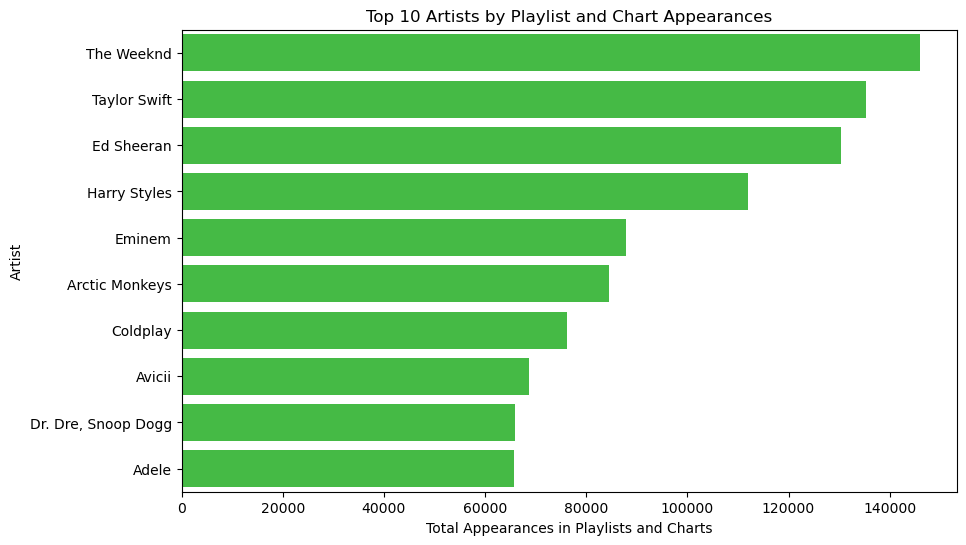

In [417]:
# Plots the top 10 artists based on total appearances in playlists and charts
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists["total_appearances"], y=top_artists.index, color="limegreen")
plt.title("Top 10 Artists by Playlist and Chart Appearances")
plt.xlabel("Total Appearances in Playlists and Charts")
plt.ylabel("Artist")

plt.show()

<b> Most frequently appearing artist overall on spotify playlist </b>

In [419]:
# Sums the spotify playlist 
artist_spotifyplaylist_counts = df.groupby("artist(s)_name")[["in_spotify_playlists"]].sum()

# Sorts by the top 10 artists
top_spotifyplaylist_artists = artist_spotifyplaylist_counts.sort_values("in_spotify_playlists", ascending=False).head(10)
print(top_spotifyplaylist_artists)

                     in_spotify_playlists
artist(s)_name                           
The Weeknd                         144053
Taylor Swift                       132974
Ed Sheeran                         128758
Harry Styles                       110026
Eminem                              87331
Arctic Monkeys                      84016
Coldplay                            75716
Avicii                              68241
Dr. Dre, Snoop Dogg                 65728
Adele                               65049


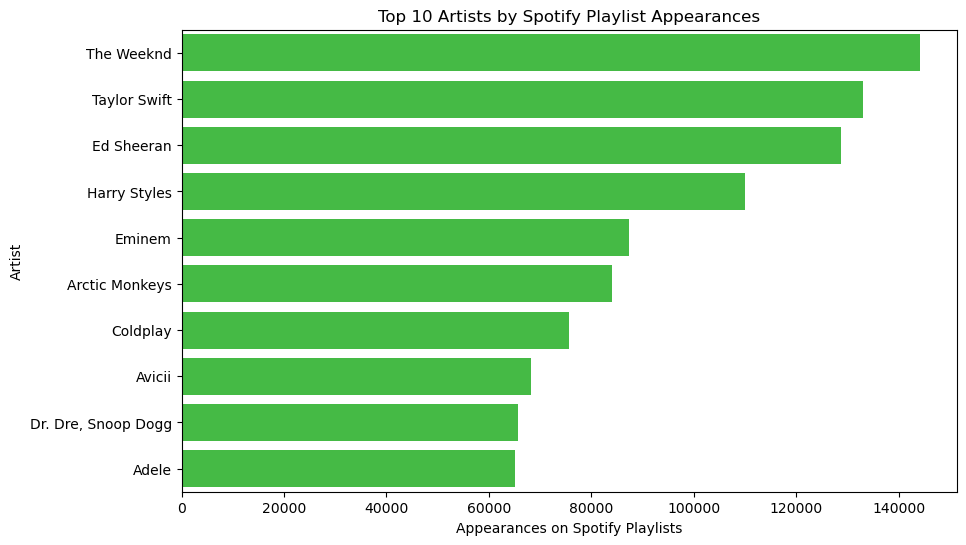

In [420]:
# Plots the top 10 artists on spotify playlist
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists["in_spotify_playlists"], y=top_artists.index, color="limegreen")
plt.title("Top 10 Artists by Spotify Playlist Appearances")
plt.xlabel("Appearances on Spotify Playlists")
plt.ylabel("Artist")

plt.show()

<b> Most frequently appearing artist overall on spotify charts </b>

In [422]:
# Sums the spotify charts
artist_spotifycharts_counts = df.groupby("artist(s)_name")[["in_spotify_charts"]].sum()

# Sorts by the top 10 artists
top_spotifycharts_artists = artist_spotifycharts_counts.sort_values("in_spotify_charts", ascending=False).head(10)
print(top_spotifycharts_artists)

                  in_spotify_charts
artist(s)_name                     
Taylor Swift                    542
Bad Bunny                       268
Arctic Monkeys                  190
Harry Styles                    185
The Weeknd                      180
NewJeans                        168
Feid                            165
Eminem                          152
Karol G                         149
Latto, Jung Kook                147


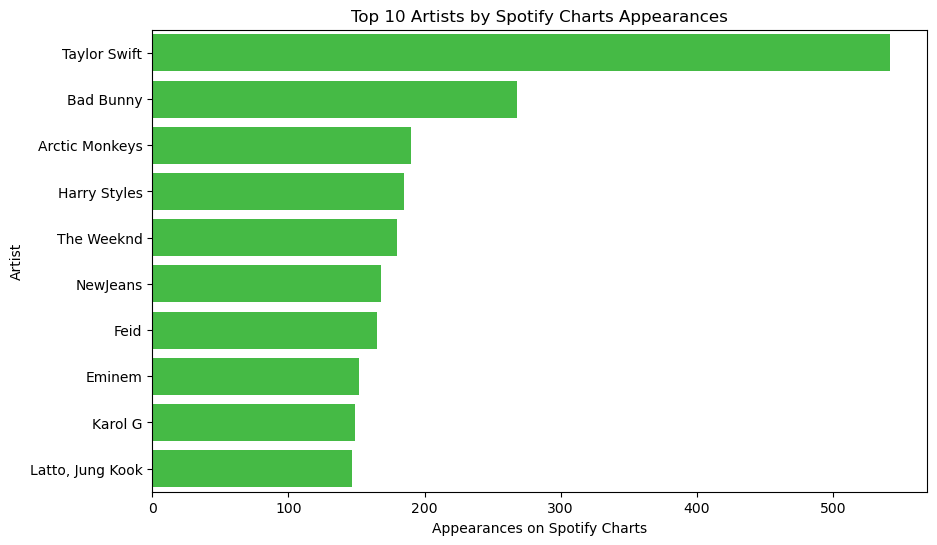

In [423]:
# Plots the top 10 artist in spotify charts
plt.figure(figsize=(10, 6))
sns.barplot(x=top_spotifycharts_artists["in_spotify_charts"], y=top_spotifycharts_artists.index, color="limegreen")
plt.title("Top 10 Artists by Spotify Charts Appearances")
plt.xlabel("Appearances on Spotify Charts")
plt.ylabel("Artist")

plt.show()

<b> Most frequently appearing artist overall on apple playlist. </b>

In [425]:
# Sums the spotify charts
artist_appleplaylist_counts = df.groupby("artist(s)_name")[["in_apple_playlists"]].sum()

# Sorts by the top 10 artists
top_appleplaylist_artists = artist_appleplaylist_counts.sort_values("in_apple_playlists", ascending=False).head(10)
print(top_appleplaylist_artists)

                in_apple_playlists
artist(s)_name                    
Taylor Swift                  1796
Harry Styles                  1741
The Weeknd                    1677
Ed Sheeran                    1448
Dua Lipa                       765
Lewis Capaldi                  738
Olivia Rodrigo                 710
SZA                            680
Adele                          646
Justin Bieber                  591


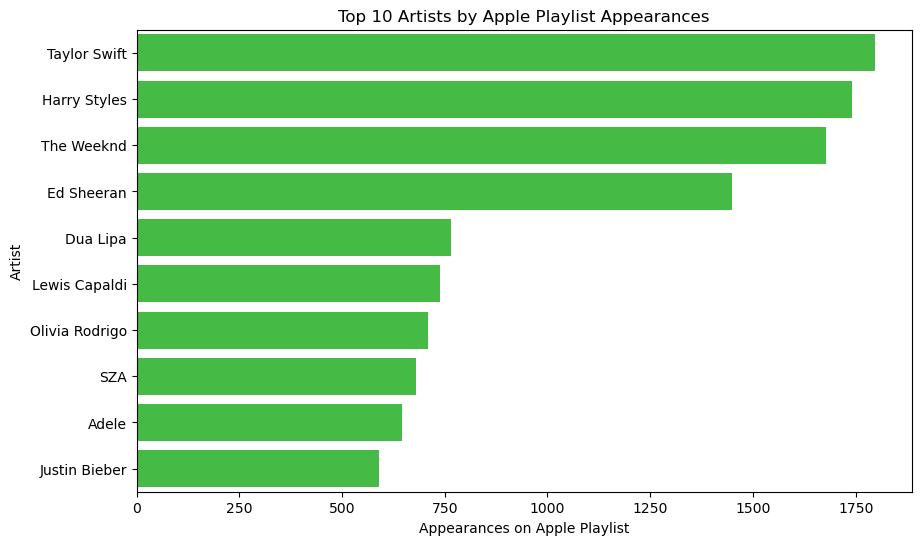

In [426]:
# Plots the top 10 artist on apple playlist
plt.figure(figsize=(10, 6))
sns.barplot(x=top_appleplaylist_artists["in_apple_playlists"], y=top_appleplaylist_artists.index, color="limegreen")
plt.title("Top 10 Artists by Apple Playlist Appearances")
plt.xlabel("Appearances on Apple Playlist")
plt.ylabel("Artist")

plt.show()